# 机器学习一

## Linear Regression Example

Implement Linear Regression for Beijing House Price Problem

In [2]:
import random

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_boston
from matplotlib.animation import FuncAnimation
import re

### Part-01: Linear Regression

In [3]:


housing_price = load_boston()
dataframe = pd.DataFrame(housing_price['data'])
dataframe.columns = housing_price['feature_names']
dataframe['price'] = housing_price['target']

# sns.heatmap(dataframe.corr(), annot=True, fmt='.1f')
# plt.show()

print(dataframe.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')


In [4]:
rm = dataframe['RM']
lst = dataframe['LSTAT']
target = dataframe['price']

In [5]:
def model(x, w, b):
    return np.dot(x, w.T) + b


def loss(yhat, y):
    return np.mean( (yhat - y) ** 2)


def partial_w(x1, x2, y, yhat):
    return np.array([2 *np.mean((yhat - y) * x1), 2 * np.mean((yhat - y)  * x2)])


def partial_b(x1, x2, y, yhat):
    return 2 * np.mean((yhat - y))

In [6]:
w = np.random.random_sample((1, 2))
print(w)
b = 0
alpha = 1e-5

epoch = 200
history = []

history_k_b_loss = []

[[0.28069036 0.31921797]]


In [6]:
for e in range(epoch):
    losses = []
    for batch in range(len(rm)):
        random_index = random.choice(range(len(rm)))

        x1, x2 = rm[random_index], lst[random_index]
        y = target[random_index]

        yhat = model(np.array([x1, x2]), w, b)
        loss_v = loss(yhat, y)

        w = w - partial_w(x1, x2, y, yhat) * alpha
        b = b - partial_b(x1, x2, y, yhat) * alpha

        losses.append(loss_v)

        history_k_b_loss.append((w, b, loss_v))

        if batch % 100 == 0:
            print('Epoch: {}, Batch: {}, loss: {}'.format(e, batch, np.mean(losses)))

    history.append(np.mean(losses))

Epoch: 0, Batch: 0, loss: 151.86271856102778
Epoch: 0, Batch: 100, loss: 263.5872813250959
Epoch: 0, Batch: 200, loss: 251.738169143727
Epoch: 0, Batch: 300, loss: 265.0873434683313
Epoch: 0, Batch: 400, loss: 246.81922554270534
Epoch: 0, Batch: 500, loss: 235.3032255992267
Epoch: 1, Batch: 0, loss: 19.57790198635195
Epoch: 1, Batch: 100, loss: 159.31380412508983
Epoch: 1, Batch: 200, loss: 149.39271607684955
Epoch: 1, Batch: 300, loss: 166.24008703389129
Epoch: 1, Batch: 400, loss: 160.65535981907715
Epoch: 1, Batch: 500, loss: 159.46308073670542
Epoch: 2, Batch: 0, loss: 218.59722447423346
Epoch: 2, Batch: 100, loss: 136.07201691576378
Epoch: 2, Batch: 200, loss: 161.51368122041697
Epoch: 2, Batch: 300, loss: 159.4969141796809
Epoch: 2, Batch: 400, loss: 146.21689426224953
Epoch: 2, Batch: 500, loss: 138.22587212292893
Epoch: 3, Batch: 0, loss: 69.70191445306189
Epoch: 3, Batch: 100, loss: 116.16786760488094
Epoch: 3, Batch: 200, loss: 119.71565030867042
Epoch: 3, Batch: 300, loss: 1

## Logstic Regression

In [7]:
import random

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_boston
from matplotlib.animation import FuncAnimation
import re

In [8]:

housing_price = load_boston()
dataframe = pd.DataFrame(housing_price['data'])
dataframe.columns = housing_price['feature_names']
dataframe['price'] = housing_price['target']

rm = dataframe['RM']
lst = dataframe['LSTAT']
price = dataframe['price']
print(np.percentile(price, 66))

23.53


In [9]:
# plt.hist(target)
# plt.show()

In [10]:
dataframe['expensive'] = dataframe['price'].apply(lambda p: int(p > np.percentile(price, 66)))
expensive = dataframe['expensive']

# print(dataframe.head())
print(dataframe['expensive'])

0      1
1      0
2      1
3      1
4      1
      ..
501    0
502    0
503    1
504    0
505    0
Name: expensive, Length: 506, dtype: int64


In [11]:
def logistic(x):
    return 1 / (1 + np.exp(-x))


def model(x, w, b):
    return logistic(np.dot(x, w.T) + b)


def loss(yhat, y):
    return -1 * np.sum(y*np.log(yhat) + (1 - y) * np.log(1 - yhat))


def partial_w(x1, x2, y, yhat):
    return np.array([np.sum((yhat - y) * x1), np.sum((yhat - y) * x2)])


def partial_b(x1, x2, y, yhat):
    return np.sum(yhat - y)

In [12]:
w = np.random.random_sample((1, 2))
print(w)
b = 0
alpha = 1e-5

epoch = 200
history = []

history_k_b_loss = []

[[0.63342409 0.81206015]]


In [13]:
for e in range(epoch):
    losses = []
    for batch in range(len(rm)):
        random_index = random.choice(range(len(rm)))

        x1, x2 = rm[random_index], lst[random_index]
        y = expensive[random_index]

        yhat = model(np.array([x1, x2]), w, b)
        loss_v = loss(yhat, y)

        w = w - partial_w(x1, x2, y, yhat) * alpha
        b = b - partial_b(x1, x2, y, yhat) * alpha

        losses.append(loss_v)

        history_k_b_loss.append((w, b, loss_v))

        if batch % 100 == 0:
            print('Epoch: {}, Batch: {}, loss: {}'.format(e, batch, np.mean(losses)))

    history.append(np.mean(losses))

Epoch: 0, Batch: 0, loss: 14.699317286911464
Epoch: 0, Batch: 100, loss: 11.205575525306255
Epoch: 0, Batch: 200, loss: 11.534464885300075
Epoch: 0, Batch: 300, loss: 11.093510633701065
Epoch: 0, Batch: 400, loss: 10.917305387961797
Epoch: 0, Batch: 500, loss: 10.859245639107462
Epoch: 1, Batch: 0, loss: 0.00040833587454561655
Epoch: 1, Batch: 100, loss: 11.618180859749076
Epoch: 1, Batch: 200, loss: 10.765679001233881
Epoch: 1, Batch: 300, loss: 10.578470615258915
Epoch: 1, Batch: 400, loss: 10.492004158205743
Epoch: 1, Batch: 500, loss: 10.26292722982353
Epoch: 2, Batch: 0, loss: 0.001954987453217921
Epoch: 2, Batch: 100, loss: 9.368271022949564
Epoch: 2, Batch: 200, loss: 9.558935647511127
Epoch: 2, Batch: 300, loss: 9.543718295085956
Epoch: 2, Batch: 400, loss: 9.43020484214525
Epoch: 2, Batch: 500, loss: 9.706852518621982
Epoch: 3, Batch: 0, loss: 25.49683935100504
Epoch: 3, Batch: 100, loss: 8.642653497468816
Epoch: 3, Batch: 200, loss: 8.859557409942477
Epoch: 3, Batch: 300, los

In [14]:
predicated = [model(np.array([x1, x2]), w, b) for x1, x2 in zip(rm, lst)]
true = expensive

In [15]:
def accuracy(y, yhat):
    return sum(1 if i == j else 0 for i, j in zip(y, yhat)) / len(y)

In [16]:
print(accuracy(true, predicated))

# decision boundary

0.0


## Linear Regression

实现了回归，其中包括线性函数的定义，为什么要用线性函数，loss的意义，梯度下降的意义，stochastic gradient descent
Use Boston house price dataset.
北京2020年房价的数据集，为什么我没有用北京房价的数据集呢？
Boston: room size, subway, highway, crime rate 有一个比较明显的关系，所以就观察关系比较容易
北京的房价：！远近，！房况 ==》 学区！！！！ => 非常贵 海淀区

In [17]:
import random

import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [18]:
dataset = load_boston()
data = dataset['data']
target = dataset['target']
columns = dataset['feature_names']

dataframe = pd.DataFrame(data)
dataframe.columns = columns
dataframe['price'] = target

In [19]:
# print(dataframe.corr()) # show the correlation of dataframe variables
# correlation => 如果一个值的增大，会引起另外一个值一定增大，而且是定比例增大 相关系数就越接近于1
# correlation => 0 就是两者之间没有任何关系
# correlation => -1 一个值增大 另外一个值一定减小 而且减小是成相等比例的

# sns.heatmap(dataframe.corr())
# plt.show()

# RM：小区平均的卧室个数
# LSTAT: 低收入人群在周围的比例

rm = dataframe['RM']
lstat = dataframe['LSTAT']


In [20]:
def linear(x, w, b):
    # vectorized model
    return np.dot(x, w.T) + b


def loss(yhat, y):
    # numpy broadcast numpy广播方法
    return np.mean( (yhat - y) ** 2)


def partial_w(x, y, yhat):
    return np.array([2 * np.mean((yhat - y) * x[0]), 2 * np.mean((yhat - y) * x[1])])


def partial_b(x, y, yhat):
    return 2 * np.mean((yhat - y))


def optimize(w, b, x, y, yhat, pw, pb, learning_rate):
    w = w + -1 * pw(x, y, yhat) * learning_rate
    b = b + -1 * pb(x, y, yhat) * learning_rate

    return w, b

In [21]:
def train(model_to_be_train, target, loss, pw, pb):

    w = np.random.random_sample((1, 2)) # w normal
    b = np.random.random() # 0 深度学习的时候会和大家详细解释
    learning_rate = 1e-5
    epoch = 200
    losses = []

    for i in range(epoch):
        batch_loss = []
        for batch in range(len(rm)):
            # batch training
            index = random.choice(range(len(rm)))
            rm_x, lstat_x = rm[index], lstat[index]
            x = np.array([rm_x, lstat_x])
            y = target[index]

            yhat = model_to_be_train(x, w, b)
            loss_v = loss(yhat, y)

            batch_loss.append(loss_v)

            w, b = optimize(w, b, x, y, yhat, pw, pb, learning_rate)

            if batch % 100 == 0:
                print('Epoch: {} Batch: {}, loss: {}'.format(i, batch, loss_v))
        losses.append(np.mean(batch_loss))

    return model_to_be_train, w, b, losses

Epoch: 0 Batch: 0, loss: 15.217773984289908
Epoch: 0 Batch: 100, loss: 423.39907672323375
Epoch: 0 Batch: 200, loss: 49.28852704246203
Epoch: 0 Batch: 300, loss: 102.63376580841799
Epoch: 0 Batch: 400, loss: 0.17425008764267713
Epoch: 0 Batch: 500, loss: 4.64099955397965
Epoch: 1 Batch: 0, loss: 299.0760381747491
Epoch: 1 Batch: 100, loss: 9.024342964530318
Epoch: 1 Batch: 200, loss: 48.25128381427064
Epoch: 1 Batch: 300, loss: 55.053060910925865
Epoch: 1 Batch: 400, loss: 104.72282947772126
Epoch: 1 Batch: 500, loss: 0.04210199560346581
Epoch: 2 Batch: 0, loss: 19.09019942544631
Epoch: 2 Batch: 100, loss: 67.2662172684278
Epoch: 2 Batch: 200, loss: 312.97798784326227
Epoch: 2 Batch: 300, loss: 155.2722922281679
Epoch: 2 Batch: 400, loss: 58.468407514384864
Epoch: 2 Batch: 500, loss: 959.9552116675985
Epoch: 3 Batch: 0, loss: 1503.562962644161
Epoch: 3 Batch: 100, loss: 0.9838898907525981
Epoch: 3 Batch: 200, loss: 127.99396510004044
Epoch: 3 Batch: 300, loss: 178.6489414918126
Epoch: 

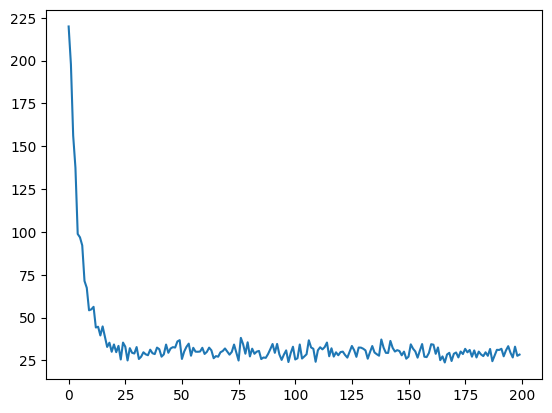

In [22]:
if __name__ == "__main__":
    import matplotlib.pyplot as plt

    target = dataframe['price']

    model, w, b, losses = train(linear, target, loss, partial_w, partial_b)
    plt.plot(losses)
    predicate = model(np.array([19, 7]), w, b)
    print(predicate)

    plt.show()

## Logstic Regression

实现了回归，其中包括线性函数的定义，为什么要用线性函数，loss的意义，梯度下降的意义，stochastic gradient descent
Use Boston house price dataset.
北京2020年房价的数据集，为什么我没有用北京房价的数据集呢？
Boston: room size, subway, highway, crime rate 有一个比较明显的关系，所以就观察关系比较容易
北京的房价：！远近，！房况 ==》 学区！！！！ => 非常贵 海淀区
Harder than deep learning:
    
1. compiler
2. programming language & automata
3. computer graphic
4. complexity system
5. computing complexity
6. operating system

In [23]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

In [24]:
dataset = load_boston()
data = dataset['data']
target = dataset['target']
columns = dataset['feature_names']

dataframe = pd.DataFrame(data)
dataframe.columns = columns
dataframe['price'] = target

# print(dataframe.corr()) # show the correlation of dataframe variables
# correlation => 如果一个值的增大，会引起另外一个值一定增大，而且是定比例增大 相关系数就越接近于1
# correlation => 0 就是两者之间没有任何关系
# correlation => -1 一个值增大 另外一个值一定减小 而且减小是成相等比例的

# sns.heatmap(dataframe.corr())
# plt.show()

# RM：小区平均的卧室个数
# LSTAT: 低收入人群在周围的比例

rm = dataframe['RM']
lstat = dataframe['LSTAT']
price = dataframe['price']
greater_then_most = np.percentile(price, 66)
dataframe['expensive'] = dataframe['price'].apply(lambda p: int(p > greater_then_most))
target = dataframe['expensive']

print(dataframe[:20])

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1   0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2   0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3   0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4   0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5   0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6   0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7   0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8   0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9   0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   
10  0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467  5.0  311.0   
11  0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267  5.0  311.0   
12  0.09378  12.5   7.87 

In [25]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def model(x, w, b):
    return sigmoid(np.dot(x, w.T) + b)


def loss(yhat, y):
    return -np.sum(y*np.log(yhat) + (1 - y)*np.log(1 - yhat))


def partial_w(x, y, yhat):
    return np.array([np.sum((yhat - y) * x[0]), np.sum((yhat - y) * x[1])])


def partial_b(x, y, yhat):
    return np.sum((yhat - y))

In [26]:

model, w, b, losses = train(model, target,loss, partial_w, partial_b)

random_test_indices = np.random.choice(range(len(rm)), size=100)
decision_boundary = 0.5

Epoch: 0 Batch: 0, loss: 21.253067852266536
Epoch: 0 Batch: 100, loss: 0.0006849557790341931
Epoch: 0 Batch: 200, loss: 24.38334293723387
Epoch: 0 Batch: 300, loss: 1.2742252610593014e-05
Epoch: 0 Batch: 400, loss: 10.693694155096928
Epoch: 0 Batch: 500, loss: 2.5396179842061183e-07
Epoch: 1 Batch: 0, loss: 10.44026817450651
Epoch: 1 Batch: 100, loss: 22.68306555112414
Epoch: 1 Batch: 200, loss: 15.526704997223845
Epoch: 1 Batch: 300, loss: 18.954875757516987
Epoch: 1 Batch: 400, loss: 0.0004715977016895439
Epoch: 1 Batch: 500, loss: 15.209040769267633
Epoch: 2 Batch: 0, loss: 9.57715187927263
Epoch: 2 Batch: 100, loss: 13.758766504545607
Epoch: 2 Batch: 200, loss: 14.485884147083423
Epoch: 2 Batch: 300, loss: 0.0003990841627994008
Epoch: 2 Batch: 400, loss: 0.0008632851925113479
Epoch: 2 Batch: 500, loss: 3.2861097960686407e-06
Epoch: 3 Batch: 0, loss: 15.46258938120003
Epoch: 3 Batch: 100, loss: 2.7040999790665627e-05
Epoch: 3 Batch: 200, loss: 13.241293090591238
Epoch: 3 Batch: 300,

/Users/lilithgames/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.



Epoch: 7 Batch: 300, loss: 12.26395472756537
Epoch: 7 Batch: 400, loss: 10.71170793991407
Epoch: 7 Batch: 500, loss: 8.770488222138587
Epoch: 8 Batch: 0, loss: 0.009396408306717365
Epoch: 8 Batch: 100, loss: 0.0012223350415579706
Epoch: 8 Batch: 200, loss: 10.603741101614984
Epoch: 8 Batch: 300, loss: 0.0027293483712676034
Epoch: 8 Batch: 400, loss: 0.006428247336544404
Epoch: 8 Batch: 500, loss: 6.400209779848934
Epoch: 9 Batch: 0, loss: 8.24793991240017
Epoch: 9 Batch: 100, loss: 11.717656872517725
Epoch: 9 Batch: 200, loss: 8.732751742823925
Epoch: 9 Batch: 300, loss: 0.0043503050124818095
Epoch: 9 Batch: 400, loss: 0.004955051324836836
Epoch: 9 Batch: 500, loss: 6.011895478365885
Epoch: 10 Batch: 0, loss: 0.01707067558098244
Epoch: 10 Batch: 100, loss: 16.645411098419558
Epoch: 10 Batch: 200, loss: 5.145380221404705
Epoch: 10 Batch: 300, loss: 9.750413216509811
Epoch: 10 Batch: 400, loss: 0.0037027573257448453
Epoch: 10 Batch: 500, loss: 6.8332027578141465
Epoch: 11 Batch: 0, loss

In [27]:
for i in random_test_indices:
    x1, x2, y = rm[i], lstat[i], target[i]
    predicate = model(np.array([x1, x2]), w, b)
    predicate_label = int(predicate > decision_boundary)

    print('RM: {}, LSTAT: {}, EXPENSIVE: {}, Predicated: {}'.format(x1, x2, y, predicate_label))

RM: 5.631, LSTAT: 29.93, EXPENSIVE: 0, Predicated: 0
RM: 5.186, LSTAT: 28.32, EXPENSIVE: 0, Predicated: 0
RM: 5.093, LSTAT: 29.68, EXPENSIVE: 0, Predicated: 0
RM: 7.203, LSTAT: 9.59, EXPENSIVE: 1, Predicated: 0
RM: 5.837, LSTAT: 15.69, EXPENSIVE: 0, Predicated: 0
RM: 6.642, LSTAT: 9.69, EXPENSIVE: 1, Predicated: 0
RM: 6.229, LSTAT: 12.87, EXPENSIVE: 0, Predicated: 0
RM: 3.863, LSTAT: 13.33, EXPENSIVE: 0, Predicated: 0
RM: 5.757, LSTAT: 17.31, EXPENSIVE: 0, Predicated: 0
RM: 6.402, LSTAT: 11.32, EXPENSIVE: 0, Predicated: 0
RM: 6.655, LSTAT: 17.73, EXPENSIVE: 0, Predicated: 0
RM: 5.856, LSTAT: 13.0, EXPENSIVE: 0, Predicated: 0
RM: 6.438, LSTAT: 3.59, EXPENSIVE: 1, Predicated: 1
RM: 6.458, LSTAT: 12.6, EXPENSIVE: 0, Predicated: 0
RM: 6.549, LSTAT: 7.39, EXPENSIVE: 1, Predicated: 1
RM: 6.51, LSTAT: 7.39, EXPENSIVE: 0, Predicated: 1
RM: 5.362, LSTAT: 10.19, EXPENSIVE: 0, Predicated: 0
RM: 5.961, LSTAT: 17.93, EXPENSIVE: 0, Predicated: 0
RM: 6.642, LSTAT: 9.69, EXPENSIVE: 1, Predicated: 0
RM

In [28]:

# 剩下一件事情，就是要检查我们这个模型的准确度到底如何！！
"""
如何衡量模型的好坏：
1. accuracy 准确度
2. precision 精确度
3. recall 召回率
4. f1, f2 score
5. AUC-ROC 曲线
引出一个非常非常重要的概念： =》 过拟合 和 欠拟合 （over-fitting and under-fitting）
整个机器学习的过程，就是在不断的进行过拟合和欠拟合的调整！
"""

'\n如何衡量模型的好坏：\n1. accuracy 准确度\n2. precision 精确度\n3. recall 召回率\n4. f1, f2 score\n5. AUC-ROC 曲线\n引出一个非常非常重要的概念： =》 过拟合 和 欠拟合 （over-fitting and under-fitting）\n整个机器学习的过程，就是在不断的进行过拟合和欠拟合的调整！\n'